In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Individual algorithm application

Histogram equalization

In [2]:
def equalize_histogram(image):
    histogram, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = histogram.cumsum()
    cdf_normalized = cdf * float(histogram.max()) / cdf.max()
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    image_equalized = (image_equalized * 255 / np.max(image_equalized)).astype('uint8')
    return image_equalized.reshape(image.shape)

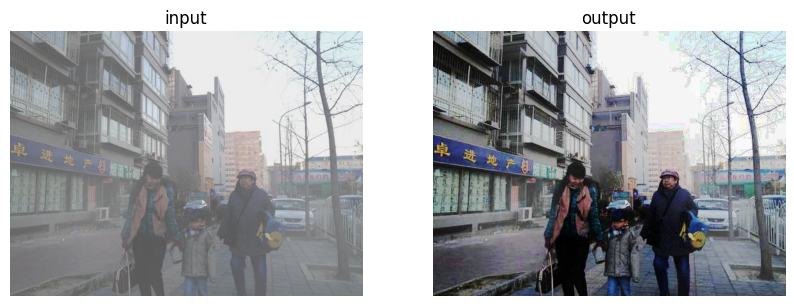

In [3]:
# Load image
img = cv2.imread('/content/haze1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('input')
plt.axis('off')

output_img = equalize_histogram(img)

# Show the dehazed image
plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title('output')
plt.axis('off')
plt.show()

Contrast Limited Adaptive Histogram Equalization (CLAHE): This is an improved version of histogram equalization that performs the operation separately for small regions in the image. This can lead to better results because it can adapt to local changes in contrast.

In [10]:
def apply_clahe(img):
    # divide into R, G, B channels
    b, g, r = cv2.split(img)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

    # Apply CLAHE to each channel
    r_clahe = clahe.apply(r)
    g_clahe = clahe.apply(g)
    b_clahe = clahe.apply(b)

    # Merge R,G,B channels
    output_img = cv2.merge([b_clahe, g_clahe, r_clahe])

    return output_img

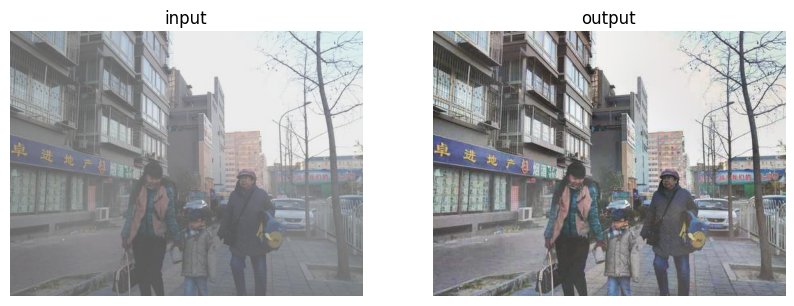

In [4]:
# Load image
img = cv2.imread('/content/haze1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('input')
plt.axis('off')

output_img = apply_clahe(img)

# Show the dehazed image
plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title('output')
plt.axis('off')
plt.show()

Gamma Correction

In [11]:
def apply_gamma_correction(img):
    # Applying gamma correction to adjust contrast
    gamma = 1.5  # adjust the gamma value as needed
    gamma_corrected = np.uint8(np.clip((img / 255.0) ** gamma * 255.0, 0, 255))
    return gamma_corrected

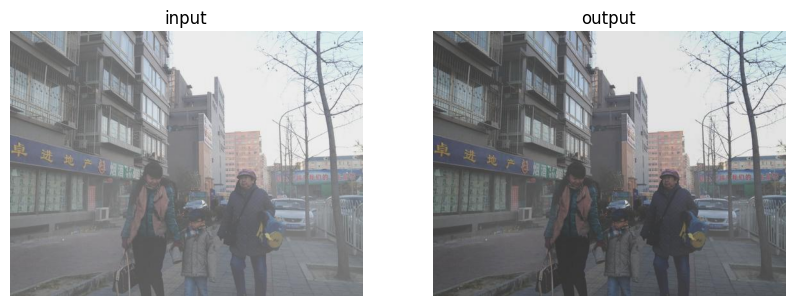

In [18]:
# Load image
img = cv2.imread('/content/haze1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('input')
plt.axis('off')

output_img = apply_gamma_correction(img)

# Show the dehazed image
plt.subplot(1, 2, 2)
plt.imshow(output_img)
plt.title('output')
plt.axis('off')
plt.show()

Unsharp Masking

In [12]:
def apply_unsharp_masking(img):
    blurred = cv2.GaussianBlur(img, (0, 0), 7)
    sharpened = cv2.addWeighted(img, 1.5, blurred, -1.0, 0)
    return sharpened

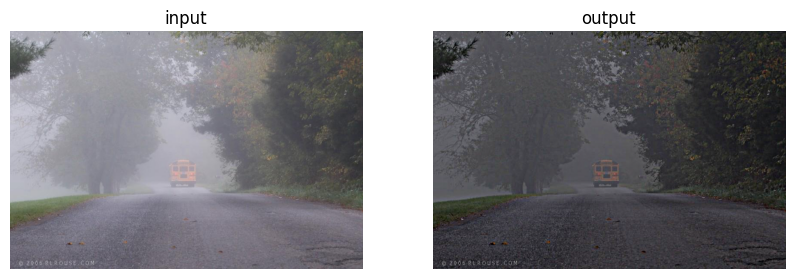

In [13]:
# Load and convert the image
img = cv2.imread('/content/foggy-school-morning.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the input image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('input')
plt.axis('off')

#apply unsharp masking to clahe applied image
output = apply_unsharp_masking(img)
plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title('output')
plt.axis('off')
plt.show()

### Pipelines

CLAHE -> gamma correction

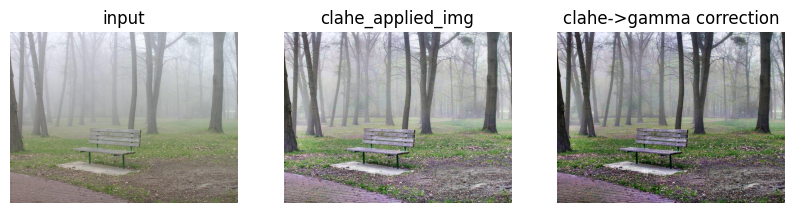

In [7]:
# Load and convert the image
img = cv2.imread('/content/foggy_bench.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the input image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('input')
plt.axis('off')

#apply clahe
clahe_applied_img = apply_clahe(img)
# Display the image
plt.subplot(1, 3, 2)
plt.imshow(clahe_applied_img)
plt.title('clahe_applied_img')
plt.axis('off')

#apply gamma correction to clahe applied image
output = apply_gamma_correction(clahe_applied_img)
plt.subplot(1, 3, 3)
plt.imshow(output)
plt.title('clahe->gamma correction')
plt.axis('off')
plt.show()

CLAHE -> unsharp masking

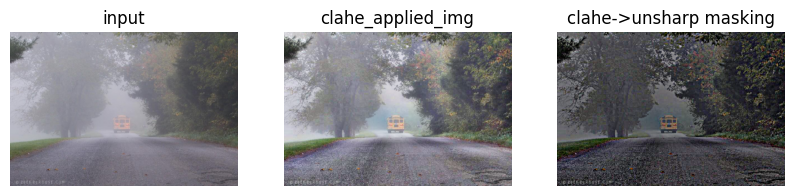

In [14]:
# Load and convert the image
img = cv2.imread('/content/foggy-school-morning.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the input image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('input')
plt.axis('off')

#apply clahe
clahe_applied_img = apply_clahe(img)
# Display the image
plt.subplot(1, 3, 2)
plt.imshow(clahe_applied_img)
plt.title('clahe_applied_img')
plt.axis('off')

#apply unsharp masking to clahe applied image
output = apply_unsharp_masking(clahe_applied_img)
plt.subplot(1, 3, 3)
plt.imshow(output)
plt.title('clahe->unsharp masking')
plt.axis('off')
plt.show()

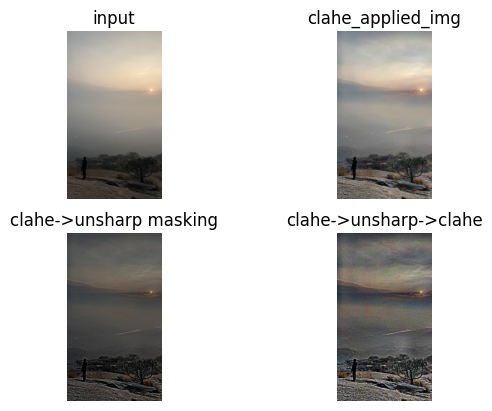

In [17]:
# Load and convert the image
img = cv2.imread('/content/haze6.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the input image
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('input')
plt.axis('off')

#apply clahe
clahe_applied_img = apply_clahe(img)
# Display the image
plt.subplot(2, 2, 2)
plt.imshow(clahe_applied_img)
plt.title('clahe_applied_img')
plt.axis('off')

#apply unsharp masking to clahe applied image
output = apply_unsharp_masking(clahe_applied_img)
plt.subplot(2, 2, 3)
plt.imshow(output)
plt.title('clahe->unsharp masking')
plt.axis('off')

#apply gamma correction to clahe applied image
output2 = apply_clahe(output)
plt.subplot(2, 2, 4)
plt.imshow(output2)
plt.title('clahe->unsharp->clahe')
plt.axis('off')
plt.show()

The above image of Coorg is captured through our camera, not from dataset.